<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.314347,91.920592,75.636464,59.777975,0.008634,280.658014,280.645026,0.012988
1,0.0,1.0,58.949385,42.753266,63.975063,33.136916,0.011857,208.826488,208.817536,0.008952
2,0.0,2.0,87.400950,56.322942,43.909235,61.922103,-0.009017,259.546213,259.557141,-0.010928
3,0.0,3.0,75.285691,38.316197,77.475874,51.958949,-0.015351,253.021359,253.039917,-0.018558
4,0.0,4.0,64.215525,69.647338,50.788257,55.961951,-0.005008,250.608064,250.613115,-0.005051
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.076550,46.133206,84.198406,43.651847,-0.010395,248.049613,248.064104,-0.014491
29996,999.0,26.0,70.787784,85.993024,38.400165,28.235046,0.003125,233.419143,233.422266,-0.003123
29997,999.0,27.0,72.774557,58.258519,99.014996,21.128651,0.003461,261.180183,261.184052,-0.003869
29998,999.0,28.0,41.014063,88.436049,63.382534,46.754535,-0.003924,249.583257,249.586333,-0.003076


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.314347,91.920592,75.636464,59.777975,0.008634,280.658014,280.645026,0.012988
1,0.0,1.0,58.949385,42.753266,63.975063,33.136916,0.011857,208.826488,208.817536,0.008952
2,0.0,2.0,87.400950,56.322942,43.909235,61.922103,-0.009017,259.546213,259.557141,-0.010928
3,0.0,3.0,75.285691,38.316197,77.475874,51.958949,-0.015351,253.021359,253.039917,-0.018558
4,0.0,4.0,64.215525,69.647338,50.788257,55.961951,-0.005008,250.608064,250.613115,-0.005051
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.076550,46.133206,84.198406,43.651847,-0.010395,248.049613,248.064104,-0.014491
29996,999.0,26.0,70.787784,85.993024,38.400165,28.235046,0.003125,233.419143,233.422266,-0.003123
29997,999.0,27.0,72.774557,58.258519,99.014996,21.128651,0.003461,261.180183,261.184052,-0.003869
29998,999.0,28.0,41.014063,88.436049,63.382534,46.754535,-0.003924,249.583257,249.586333,-0.003076


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.314347,91.920592,75.636464,59.777975,0.008634,280.658014,280.645026,0.012988
1,0.0,1.0,58.949385,42.753266,63.975063,33.136916,0.011857,208.826488,208.817536,0.008952
2,0.0,2.0,87.400950,56.322942,43.909235,61.922103,-0.009017,259.546213,259.557141,-0.010928
3,0.0,3.0,75.285691,38.316197,77.475874,51.958949,-0.015351,253.021359,253.039917,-0.018558
4,0.0,4.0,64.215525,69.647338,50.788257,55.961951,-0.005008,250.608064,250.613115,-0.005051
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.076550,46.133206,84.198406,43.651847,-0.010395,248.049613,248.064104,-0.014491
29996,999.0,26.0,70.787784,85.993024,38.400165,28.235046,0.003125,233.419143,233.422266,-0.003123
29997,999.0,27.0,72.774557,58.258519,99.014996,21.128651,0.003461,261.180183,261.184052,-0.003869
29998,999.0,28.0,41.014063,88.436049,63.382534,46.754535,-0.003924,249.583257,249.586333,-0.003076


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

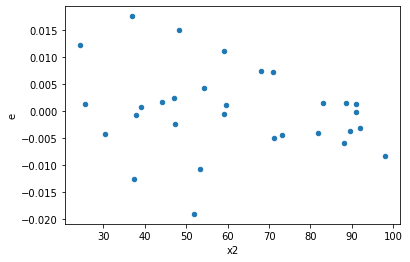

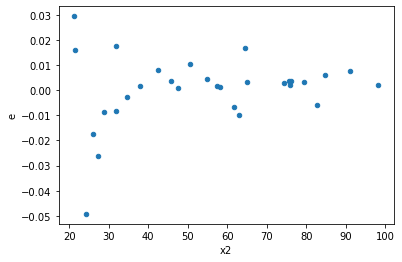

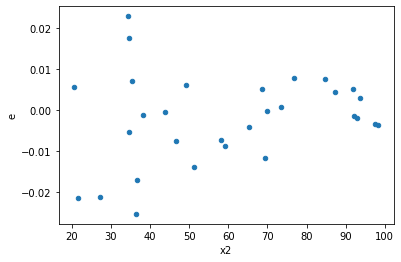

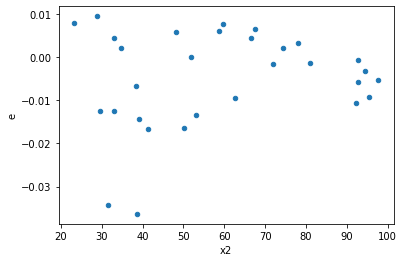

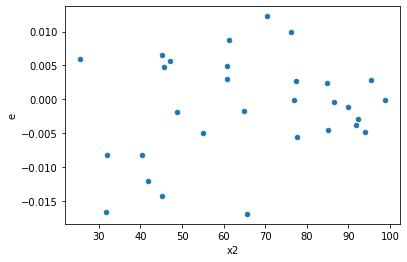

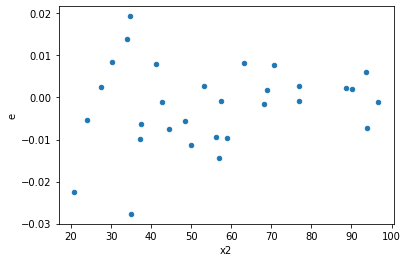

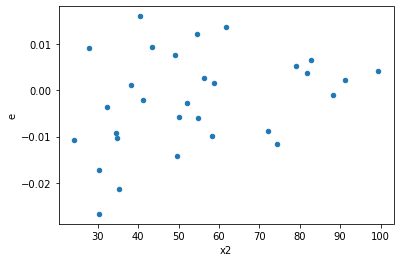

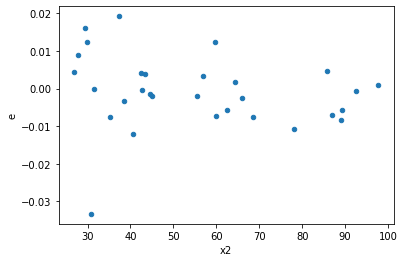

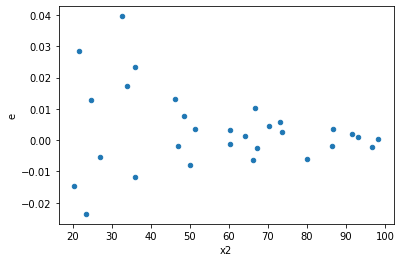

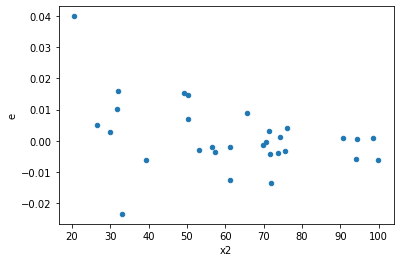

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,8.0,8.0,0.00013734084245812928,0.0002041335199092831,1.716760530726616e-05,2.551668998866039e-05,1.4863278559800355,0.5881211933350048,0.7059394033324976,0.2940605966675024,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,0.0005924064995872304,0.0006319398124602756,7.40508124484038e-05,7.899247655753445e-05,1.0667334218996427,0.9294407029401139,0.535279648529943,0.46472035147005697,Reject005=1 : Homoscedasticity
9.0,8.0,8.0,0.00047949951732421595,0.0005524933300480639,5.9937439665526993e-05,6.906166625600799e-05,1.152229168302776,0.8460478349684342,0.5769760825157829,0.4230239174842171,Reject005=1 : Homoscedasticity
35.0,8.0,8.0,0.0003415700260452689,0.001242536650287425,4.269625325565861e-05,0.00015531708128592813,3.6377215667125005,0.08621310263641258,0.9568934486817937,0.04310655131820629,Reject005=1 : Homoscedasticity
39.0,8.0,8.0,0.0007004238766369407,0.000900440345060663,8.755298457961759e-05,0.00011255504313258287,1.2855648916254738,0.7309143959372646,0.6345428020313677,0.3654571979686323,Reject005=1 : Homoscedasticity
44.0,8.0,8.0,0.0002873557044839376,0.0008515034415162814,3.59194630604922e-05,0.00010643793018953518,2.963238342685757,0.14543305073801482,0.9272834746309926,0.07271652536900741,Reject005=1 : Homoscedasticity
52.0,8.0,8.0,9.166373470513055e-05,0.0004969731453920351,1.1457966838141319e-05,6.212164317400438e-05,5.421698635678858,0.02768601132068138,0.9861569943396593,0.01384300566034069,Reject005=0 : Heteroscedasticity
57.0,8.0,8.0,0.00024344956057291339,0.0004700633554148558,3.0431195071614173e-05,5.8757919426856976e-05,1.9308449532981242,0.3711851371926074,0.8144074314036963,0.1855925685963037,Reject005=1 : Homoscedasticity
67.0,8.0,8.0,0.0004986159791154927,0.0005809239525548926,6.232699738943658e-05,7.261549406936158e-05,1.1650728754930961,0.8341833456739407,0.5829083271630296,0.41709167283697035,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.001029348653307984,0.00010654750210117629,0.000128668581663498,1.3318437762647036e-05,0.10350963374631918,0.004291847230328524,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,0.0020201958947418915,0.000606154008986619,0.00025252448684273644,7.576925112332737e-05,0.3000471442221516,0.10836552306707883,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,0.00033509522351396075,0.00017820441236264303,4.188690293924509e-05,2.227555154533038e-05,0.531802305308654,0.39042757321612565,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,0.0005326196884977871,0.00044334555820946784,6.657746106222339e-05,5.541819477618348e-05,0.8323867250568411,0.8015694391891338,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,0.0006313510253223169,0.0002184979411220147,7.891887816528961e-05,2.7312242640251836e-05,0.34607996559515725,0.15459510505931479,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,0.0011801737877663572,0.0005151045094229611,0.00014752172347079465,6.438806367787014e-05,0.43646496368799037,0.26215593232352236,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.00013734084245812928,0.0002041335199092831,1.716760530726616e-05,2.551668998866039e-05,1.4863278559800355,0.5881211933350048,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,0.0005924064995872304,0.0006319398124602756,7.40508124484038e-05,7.899247655753445e-05,1.0667334218996427,0.9294407029401139,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,0.0014400655226503723,0.0007254439683172642,0.00018000819033129654,9.068049603965803e-05,0.5037576116551412,0.35173140363457356,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      649
Reject005=0 : Heteroscedasticity    351
Name: Result_test, dtype: int64